In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("googleplaystoredata.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
df.columns = df.columns.str.replace(" ", "_")
df.columns
# replace blank to '_' for more usable

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [10]:
df.shape
# rows -> sample
# columsn -> eigen features

(10841, 13)

In [12]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [14]:
import seaborn as sns 

In [15]:
sns.set_theme()
sns.set(rc={"figure.dpi":300,"figure.figsize":(12,9)})

<AxesSubplot:>

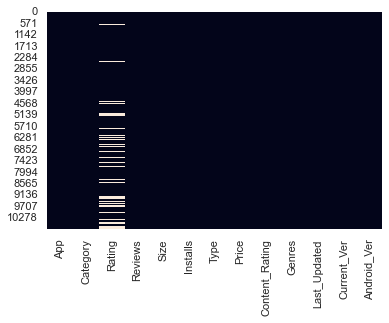

In [17]:
sns.heatmap(df.isnull(), cbar=False) # where is the missings

In [20]:
rate_median = df.Rating.median()
rate_median

4.3

In [22]:
# missing value handling
df.Rating.fillna(rate_median, inplace=True) # we can't drop na thats so much on rate col.
df.dropna(inplace=True) # we can drop other little NA
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content_Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last_Updated    10829 non-null  object 
 11  Current_Ver     10829 non-null  object 
 12  Android_Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [25]:
df.Reviews.describe() # turn into integer

count     10829
unique     5999
top           0
freq        594
Name: Reviews, dtype: object

In [28]:
df.Reviews = df.Reviews.astype("int64")

In [30]:
df.Reviews.describe().round()

count       10829.0
mean       444602.0
std       2929213.0
min             0.0
25%            38.0
50%          2100.0
75%         54815.0
max      78158306.0
Name: Reviews, dtype: float64

In [34]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [35]:
print(len(df["Size"].unique()))

457


In [44]:
df.Size.replace("M", "", regex=True, inplace=True)
df.Size.replace("k", "", regex=True, inplace=True)
size_median = df.Size[df.Size != "Varies with device"].astype("float").median()
size_median

15.0

In [49]:
df.Size.replace("Varies with device", size_median, inplace=True)
df["Size"] = pd.to_numeric(df["Size"])
df.Size.dtype

dtype('float64')

In [52]:
df.Size.describe().round()

count    10829.0
mean        34.0
std         91.0
min          1.0
25%          7.0
50%         15.0
75%         28.0
max       1020.0
Name: Size, dtype: float64

In [53]:
df.Installs.unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [54]:
df.Installs = df.Installs.apply(lambda x: x.replace("+",""))
df.Installs = df.Installs.apply(lambda x: x.replace(",",""))
df.Installs = df.Installs.apply(lambda x: int(x))
df.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [55]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [57]:
df.Price = df["Price"].apply(lambda x: x.replace("$",""))
df.Price = df["Price"].apply(lambda x: float(x))
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [58]:
len(df["Genres"].unique())

119

In [59]:
df.Genres.head()

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
Name: Genres, dtype: object

In [60]:
df.Genres = df.Genres.str.split(";").str[0]
df.Genres.unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [61]:
df.Genres.value_counts()

Tools                      841
Entertainment              666
Education                  644
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            390
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          233
Simulation                 218
Video Players & Editors    178
Puzzle                     166
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   110
Adventure                   91
House & 

In [62]:
df.Genres.replace("Music & Audio","Music", inplace=True)

In [63]:
df["Last_Updated"].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last_Updated, dtype: object

In [65]:
df.Last_Updated = pd.to_datetime(df["Last_Updated"])
df.Last_Updated.head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last_Updated, dtype: datetime64[ns]

In [67]:
df.dtypes # end of the data cleaning

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content_Rating            object
Genres                    object
Last_Updated      datetime64[ns]
Current_Ver               object
Android_Ver               object
dtype: object

<AxesSubplot:>

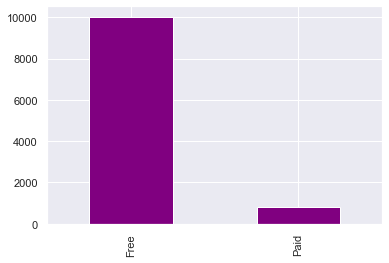

In [71]:
df["Type"].value_counts().plot(kind="bar", color="purple")

<AxesSubplot:xlabel='Type', ylabel='Rating'>

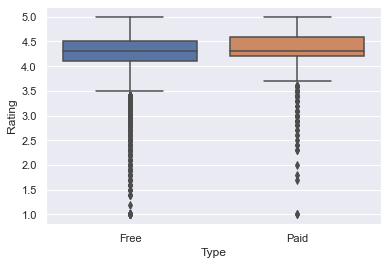

In [72]:
sns.boxplot(x="Type", y="Rating", data=df)

Text(0.5, 1.0, 'Content Rating by Count')

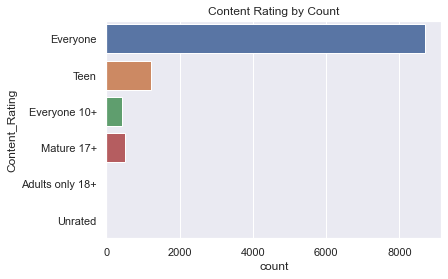

In [74]:
import matplotlib.pyplot as plt
sns.countplot(y="Content_Rating", data=df)
plt.title("Content Rating by Count")

<AxesSubplot:xlabel='Content_Rating', ylabel='Rating'>

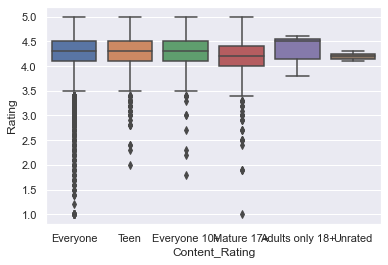

In [76]:
sns.boxplot(x="Content_Rating", y="Rating", data=df)

Text(0.5, 1.0, 'The Number of Categories')

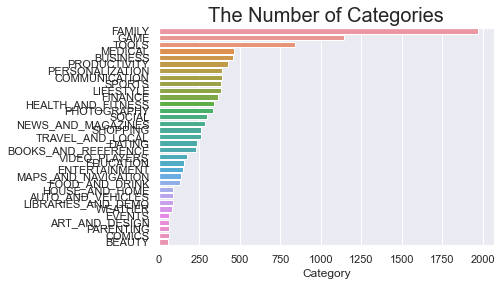

In [81]:
category_num = df.Category.value_counts()
sns.barplot(x=category_num, y=category_num.index, data=df)
plt.title("The Number of Categories", size=20)

<AxesSubplot:xlabel='Price', ylabel='Category'>

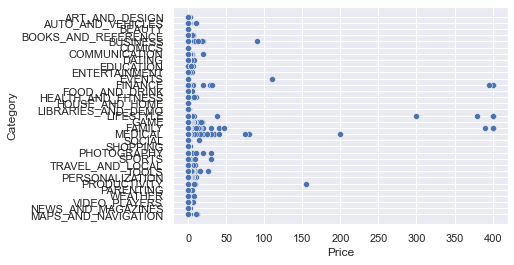

In [83]:
sns.scatterplot(x="Price", y="Category", data=df)

<AxesSubplot:>

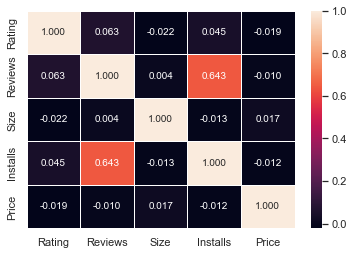

In [85]:
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt=".3f")

<AxesSubplot:xlabel='Rating', ylabel='Count'>

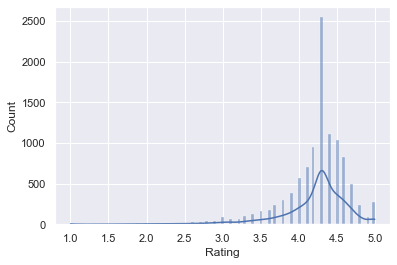

In [89]:
sns.histplot(df["Rating"], kde=True)

In [ ]:
# End of the data visualization #